In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob



In [176]:
path= r'C:\Users\Admin\Downloads\GDP assinment\Data I-B'
all_files = glob.glob(path + "/*.csv")
print(all_files)

['C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Andhra_Pradesh.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Arunachal_Pradesh.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Assam.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Bihar.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Chhattisgarh.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Gujarat.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Haryana.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Himachal_Pradesh.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Jharkhand.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Karnataka.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Kerala.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Madhya_Pradesh.csv', 'C:\\Users\\Admin\\Downloads\\GDP assinment\\Data I-B\\NAD-Maharashtra.csv', 'C:\\User

In [177]:
li = []
for filename in all_files:
    # Reading each file as a pandas dataframe
    df = pd.read_csv(filename, index_col=None, header=0, encoding="cp1252")
    # Selecting only required columns
    df = df[['Item','2014-15']]
    # Transpose the data
    df = df.T
    # Taking the header row
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    # Assign the new header
    df.columns = new_header 
    # Add the section name from the filename
    df.loc[:,'States'] = filename.split('\\')[-1].split('-')[-1].split('.')[0]
    # Append the final DF to the list
    li.append(df)
    
# Creating a final DF by joining all the df's in the list li
frame = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [178]:
frame.columns

Index(['Agriculture, forestry and fishing', 'Air transport',
       'Communication & services related to broadcasting', 'Construction',
       'Crops', 'Electricity, gas, water supply & other utility services',
       'Financial services', 'Fishing and aquaculture', 'Forestry and logging',
       'Gross State Domestic Product', 'Hotels & restaurants', 'Livestock',
       'Manufacturing', 'Mining and quarrying', 'Other services',
       'Per Capita GSDP (Rs.)', 'Population ('00)', 'Primary',
       'Public administration', 'Railways',
       'Real estate, ownership of dwelling & professional services',
       'Road transport', 'Road transport*', 'Road transport**', 'Secondary',
       'Services incidental to transport', 'Services incidental to transport*',
       'States', 'Storage', 'Subsidies on products',
       'TOTAL GSVA at basic prices', 'Taxes on Products', 'Tertiary',
       'Trade & repair services', 'Trade & repair services*',
       'Trade, repair, hotels and restaurants',
 

In [179]:
frame_1 = frame.sort_values(by=['Per Capita GSDP (Rs.)'], ascending=False)

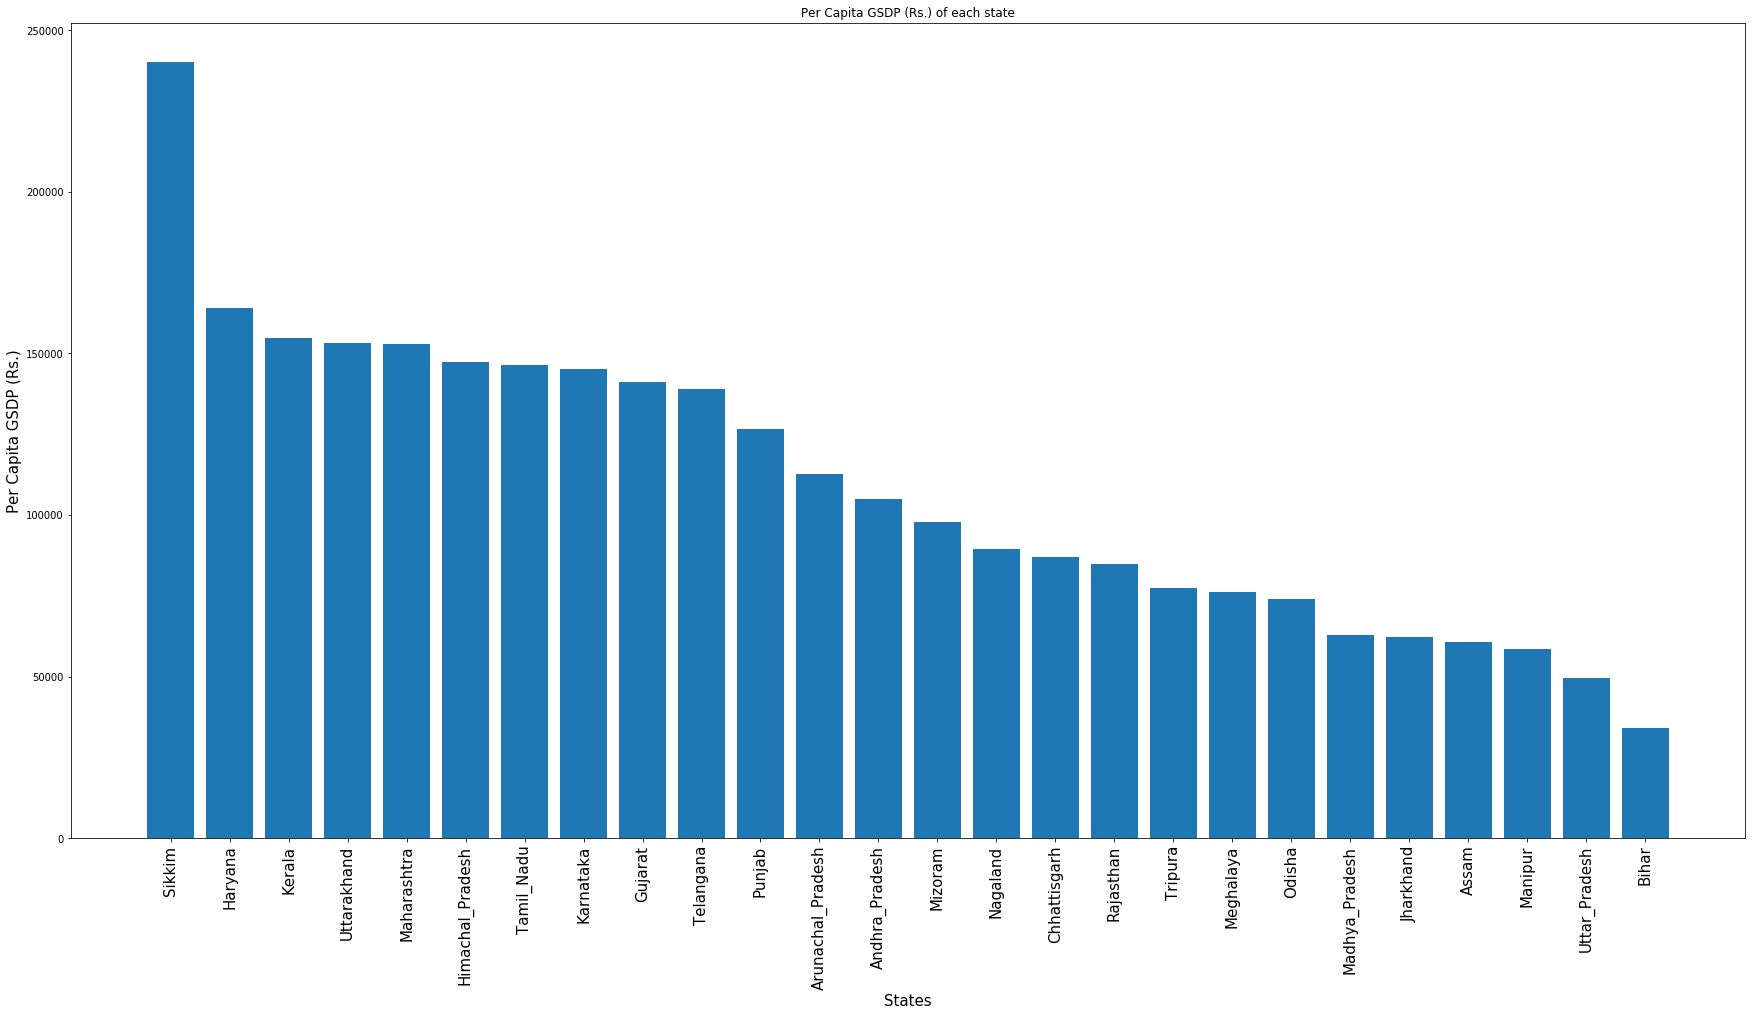

In [180]:
fig = plt.figure(figsize=(30, 15))
plt.bar(frame_1['States'] ,frame_1['Per Capita GSDP (Rs.)'])
plt.xlabel('States', fontsize=15)
plt.ylabel('Per Capita GSDP (Rs.)', fontsize=15)
plt.xticks(frame_1['States'], fontsize=15, rotation=90)
plt.title('Per Capita GSDP (Rs.) of each state')
plt.savefig("Per Capita GSDP (Rs.) of each state.png")
plt.show()

## I have downloaded the data only for states, but since it was mentioned in  the problem description, this how i will drop the union territories from the dataframe.

union_territories=['Andaman & Nicobar Islands','Chandigarh','Dadar and Nagar Haveli','Daman and Diu','Delhi','Lakshadweep','Puducherry']
for i in union_territories:
    if i in frame['States']:
        frame.drop(i)

Identify the top 5 and the bottom 5 states based on the GDP per capita.

A :  top 5: Sikkim, Haryana, Kerala, Uttrakhand, Maharashtra
Bottom 5: Bihar, Uttar Pradesh, Manipur, Assam,Jharkhand
Find the ratio of the highest per capita GDP to the lowest per capita GDP.
A  7.076456382164104

In [181]:
#Answer for  Find the ratio of the highest per capita GDP to the lowest per capita GDP.
ratio= frame['Per Capita GSDP (Rs.)'].max()/frame['Per Capita GSDP (Rs.)'].min()
ratio

7.076456382164104

In [182]:
frame['percentage_primary']= (frame['Primary']/frame['TOTAL GSVA at basic prices'])*100
frame['percentage_secondary']= (frame['Secondary']/frame['TOTAL GSVA at basic prices'])*100
frame['percentage_tertiary']= (frame['Primary']/frame['TOTAL GSVA at basic prices'])*100

In [183]:
frame.columns

Index(['Agriculture, forestry and fishing', 'Air transport',
       'Communication & services related to broadcasting', 'Construction',
       'Crops', 'Electricity, gas, water supply & other utility services',
       'Financial services', 'Fishing and aquaculture', 'Forestry and logging',
       'Gross State Domestic Product', 'Hotels & restaurants', 'Livestock',
       'Manufacturing', 'Mining and quarrying', 'Other services',
       'Per Capita GSDP (Rs.)', 'Population ('00)', 'Primary',
       'Public administration', 'Railways',
       'Real estate, ownership of dwelling & professional services',
       'Road transport', 'Road transport*', 'Road transport**', 'Secondary',
       'Services incidental to transport', 'Services incidental to transport*',
       'States', 'Storage', 'Subsidies on products',
       'TOTAL GSVA at basic prices', 'Taxes on Products', 'Tertiary',
       'Trade & repair services', 'Trade & repair services*',
       'Trade, repair, hotels and restaurants',
 

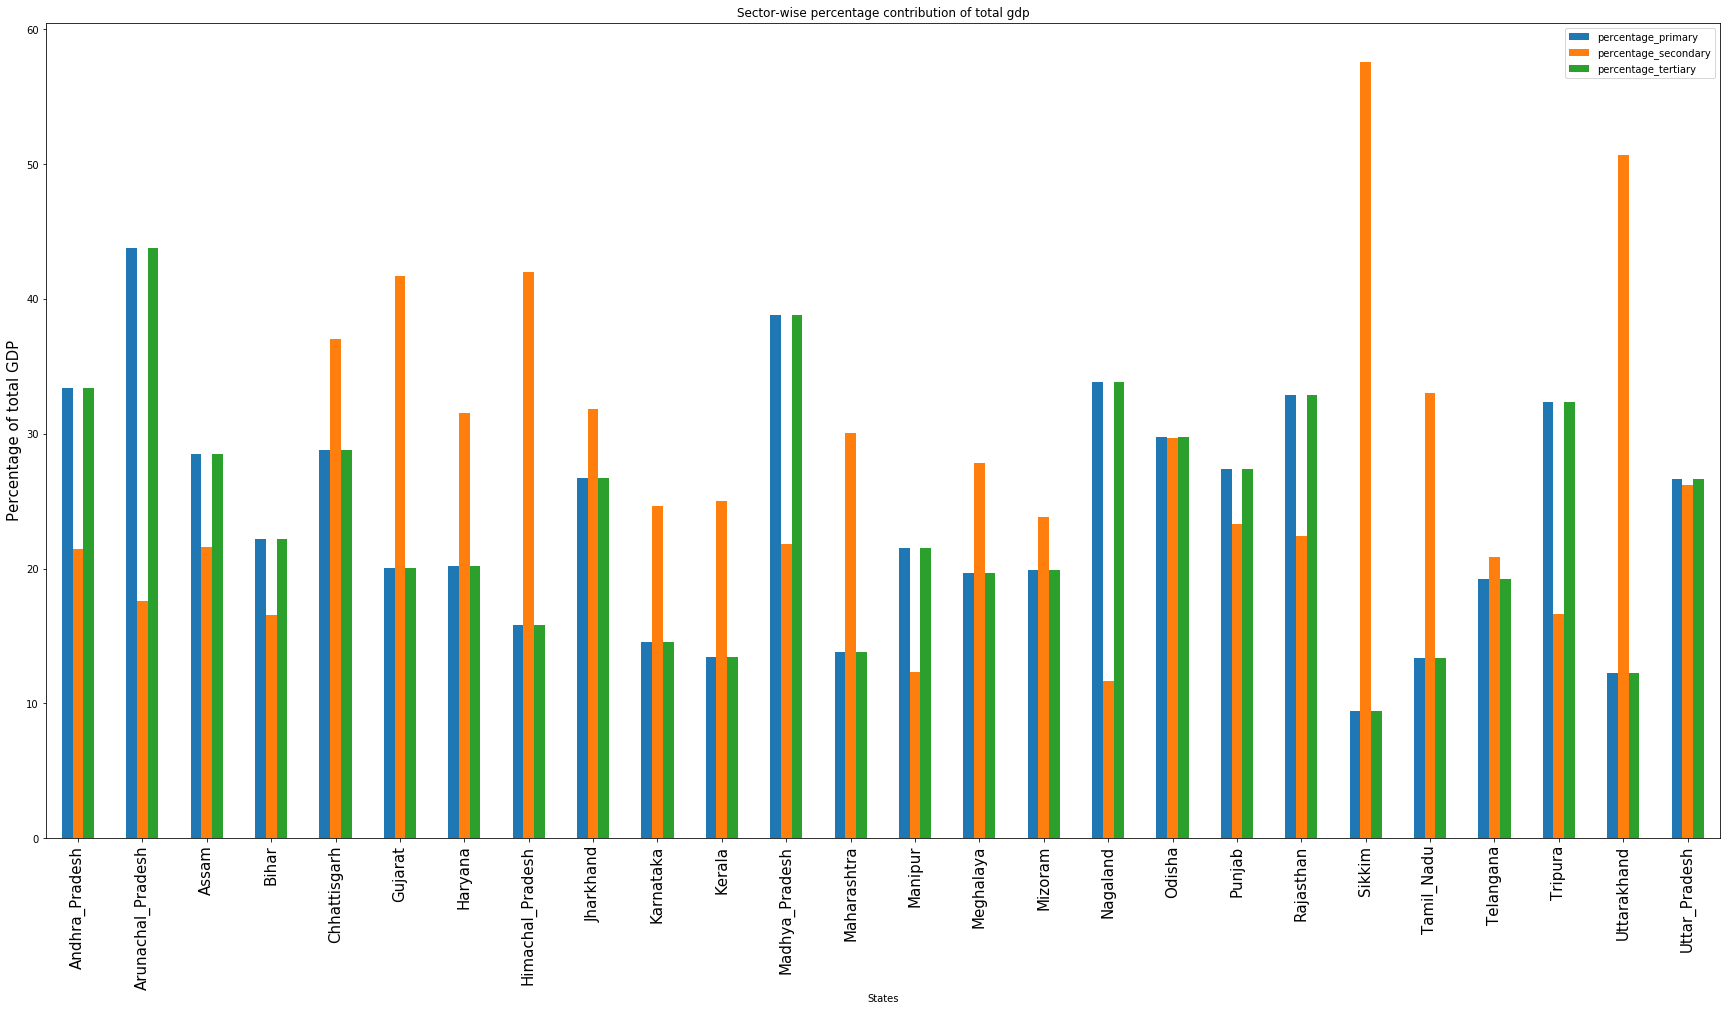

In [184]:

frame.plot(x='States', y=["percentage_primary", "percentage_secondary", "percentage_tertiary"], kind="bar", figsize=(30,15))

#plt.xlabel('States', fontsize=15)
plt.ylabel('Percentage of total GDP', fontsize=15)
plt.xticks( fontsize=15, rotation=90)
plt.title('Sector-wise percentage contribution of total gdp')
plt.savefig("Sector-wise percentage contribution of total gdp.png")
plt.show()

## Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.
## 1. Which plot will you use here? Why?
## 2. Why is (Primary + Secondary + Tertiary) not equal to total GDP?
## 3. Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.


Answer:
1. I have used a bar plot which is categorised into primary, secondary and tertiary for each state as just looking at the plot we can see that the percentage of TOTAL GSVA at basic prices, how much is being contributed by each sector.

2. The reason the primary+ secondary + tertiary= total GDP because the goverment collect taxes are added and provides subsidies which is subtracted.

In [185]:
frame['percentile_rank_states']= frame['TOTAL GSVA at basic prices'].rank(pct=True)

In [186]:
data= frame[['percentile_rank_states','percentage_primary']]
data['percentage_primary'] = data['percentage_primary'].astype(float)
data

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,percentile_rank_states,percentage_primary
0,0.769231,33.391777
1,0.115385,43.816079
2,0.384615,28.535525
3,0.576923,22.163956
4,0.461538,28.795566
5,0.846154,20.077045
6,0.615385,20.187663
7,0.307692,15.798278
8,0.423077,26.745705
9,0.884615,14.530479


In [187]:
data['percentage_primary'].corr(data['percentile_rank_states'])

-0.15418806117522985

In [188]:
q_val_1= frame['Per Capita GSDP (Rs.)'].quantile(.2)
q_val_2= frame['Per Capita GSDP (Rs.)'].quantile(.5)
q_val_3= frame['Per Capita GSDP (Rs.)'].quantile(.85)
q_val_4= frame['Per Capita GSDP (Rs.)'].quantile(1)

In [189]:
q_val_1

62989.0

In [190]:
q_val_2

101332.0

In [191]:
q_val_3

152908.75

In [192]:
q_val_4

240274.0

In [193]:
frame_c4= frame.loc[frame['Per Capita GSDP (Rs.)']<q_val_1]

In [194]:
frame_c4['category']='c4'
frame_c4

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,percentage_primary,percentage_secondary,percentage_tertiary,percentile_rank_states,category
2,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,...,2876251,NaN,2987155,1194568,4502,28.5355,21.6056,28.5355,0.384615,c4
3,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,...,7081391,NaN,7448373,3147173,2228,22.164,16.5398,22.164,0.576923,c4
8,3211065,6716,323214,1789834,2094466,337489,551441,108947,445149,21710718,...,1840196,NaN,1991359,1470022,0,26.7457,31.8066,26.7457,0.423077,c4
13,383140,6288,42017,143182,226583,27490,30315,35243,45831,1.80428e+06,...,253637,NaN,262950,109726,NaN,21.5169,12.3648,21.5169,0.153846,c4
25,25097754,36582,1914737,11256450,16215212,2030625,3392275,380730,1404936,104337115,...,8476139,NaN,9437243,7404509,681,26.6613,26.1993,26.6613,0.923077,c4


In [195]:
frame_c3= frame.loc[(frame['Per Capita GSDP (Rs.)']>=q_val_1) & (frame['Per Capita GSDP (Rs.)']<=q_val_2)]
frame_c3['category']='c3'
frame_c3

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,percentage_primary,percentage_secondary,percentage_tertiary,percentile_rank_states,category
4,3948847,9507,294552,2669855,2613371,1198438,739057,385483,597785,23498180,...,1414164,NaN,1535571,871770,0,28.7956,37.0645,28.7956,0.461538,c3
11,16235647,26746,905381,4403151,13216013,1272905,1988794,121277,965588,48198169,...,5053625,NaN,5357515,2865802,0,38.7994,21.829,38.7994,0.653846,c3
14,366521,1443,40547,150256,223330,54473,64091,9583,61166,2.44081e+06,...,357727,NaN,383974,148189,NaN,19.6995,27.862,19.6995,0.230769,c3
15,217010,144,17395,133228,116609,128365,23168,7048,47763,1155933,...,111324,NaN,114315,52587,331,19.9065,23.8308,19.9065,0.038462,c3
16,607897,4153,37794,156072,375825,37944,60393,8470,99802,1841424,...,134174,NaN,140781,77521,600,33.8281,11.6586,33.8281,0.192308,c3
17,6422978,15354,513531,2402396,4382636,833067,1065147,460636,791463,32197092,...,2886789,NaN,3149555,2034016,50349,29.7777,29.7128,29.7777,0.500000,c3
19,15044394,13469,1150955,5353326,7673441,1122888,1827413,58036,1956660,61219447,...,6942748,NaN,7297290,3814461,0,32.865,22.4023,32.865,0.807692,c3
23,799825,NaN,66676,177899,397591,77870,86094,168961,145096,2.96666e+06,...,390423,NaN,390423,155956,NaN,32.3639,16.6383,32.3639,0.269231,c3


In [196]:
frame_c2= frame.loc[(frame['Per Capita GSDP (Rs.)']>=q_val_2) & (frame['Per Capita GSDP (Rs.)']<=q_val_3)]
frame_c2['category']='c2'
frame_c2

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,percentage_primary,percentage_secondary,percentage_tertiary,percentile_rank_states,category
0,14819416,14900,928756,4664889,7893514,1151729,1900863,2270664,346160,52646842,...,3716000,NaN,4233400,5076984,94200,33.3918,21.4824,33.3918,0.769231,c2
1,686117,0,19568,147842,415520,113527,25207,8193,224017,1676119,...,56796,NaN,60421,35203,0,43.8161,17.5695,43.8161,0.115385,c2
5,1.377e+07,NaN,1.24252e+06,5.52602e+06,9.67109e+06,3.40998e+06,4.60664e+06,638357,761616,8.95027e+07,...,1.01787e+07,NaN,1.01787e+07,4.55591e+06,NaN,20.077,41.7327,20.077,0.846154,c2
7,1514981,3979,194266,808256,853758,767268,362521,9968,540950,10436879,...,494162,NaN,615496,552234,0,15.7983,42.0286,15.7983,0.307692,c2
9,11219422,171785,1349520,6104799,8157179,1425762,4094169,500390,693082,92178806,...,7523720,NaN,8991658,5097652,24152,14.5305,24.6677,14.5305,0.884615,c2
12,16475655,174188,2551115,9450211,10435121,4334702,16143324,475141,1592564,179212165,...,14286902,NaN,15839100,9697246,223626,13.7856,30.0601,13.7856,1.000000,c2
18,9285716,4473,660819,2202962,5690972,911611,2057520,107657,848245,36801089,...,4201252,NaN,4419919,1951809,0,27.4068,23.3054,27.4068,0.538462,c2
21,13064238,180836,1903283,12216718,7297820,1710379,5598498,680352,392705,109256373,...,11252588,NaN,12895842,7188320,70414,13.3947,33.0018,13.3947,0.961538,c2
22,7591501,120691,753992,2854024,4162493,716266,3023729,266968,210741,51117765,...,5724128,NaN,6494607,3604741,0,19.2165,20.88,19.2165,0.692308,c2


In [201]:
frame_c1= frame.loc[(frame['Per Capita GSDP (Rs.)']>=q_val_3) & (frame['Per Capita GSDP (Rs.)']<=q_val_4)]
frame_c1['category']='c1'
frame_c1



C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,percentage_primary,percentage_secondary,percentage_tertiary,percentile_rank_states,category
6,8.01524e+06,NaN,479658,3.70257e+06,4.63673e+06,1.10192e+06,1.67149e+06,110080,352254,4.37462e+07,...,4.81778e+06,NaN,4.98632e+06,2.56062e+06,NaN,20.1877,31.5388,20.1877,0.615385,c1
10,5930617,125029,884767,7314003,3070386,482470,2010306,704319,499808,52600230,...,NaN,7763847,8557345,4020934,26956,13.4543,25.0243,13.4543,0.730769,c1
20,137447,0,12064,82058,114976,212499,21079,604,4529,1520933,...,64624,NaN,70568,47347,0,9.45899,57.6126,9.45899,0.076923,c1
24,1.60142e+06,3889,733778,1.34273e+06,866146,433880,385030,4796,339293,1.61985e+07,...,1.53407e+06,NaN,1.74311e+06,1.06669e+06,NaN,12.2438,50.6928,12.2438,0.346154,c1


In [202]:
#frame_by_category= pd.concat([frame_c1, frame_c2, frame_c3, frame_c4]) 
#frame_by_category.columns

In [203]:
frame_c1 = frame_c1.append(frame_c1.agg(['sum']))
frame_c1

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,percentage_primary,percentage_secondary,percentage_tertiary,percentile_rank_states,category
6,8.01524e+06,NaN,479658,3.70257e+06,4.63673e+06,1.10192e+06,1.67149e+06,110080,352254,4.37462e+07,...,4.81778e+06,NaN,4.98632e+06,2.56062e+06,NaN,20.1877,31.5388,20.1877,0.615385,c1
10,5930617,125029,884767,7314003,3070386,482470,2010306,704319,499808,52600230,...,NaN,7763847,8557345,4020934,26956,13.4543,25.0243,13.4543,0.730769,c1
20,137447,0,12064,82058,114976,212499,21079,604,4529,1520933,...,64624,NaN,70568,47347,0,9.45899,57.6126,9.45899,0.076923,c1
24,1.60142e+06,3889,733778,1.34273e+06,866146,433880,385030,4796,339293,1.61985e+07,...,1.53407e+06,NaN,1.74311e+06,1.06669e+06,NaN,12.2438,50.6928,12.2438,0.346154,c1
sum,1.56847e+07,128918,2.11027e+06,1.24414e+07,8.68824e+06,2.23077e+06,4.0879e+06,819799,1.19588e+06,1.14066e+08,...,6.41648e+06,7763847,1.53573e+07,7.6956e+06,26956,55.3447,164.869,55.3447,1.769231,c1c1c1c1


In [206]:
col= list(frame_c1.columns)

In [207]:
col

['Agriculture, forestry and fishing',
 'Air transport',
 'Communication & services related to broadcasting',
 'Construction',
 'Crops',
 'Electricity, gas, water supply & other utility services',
 'Financial services',
 'Fishing and aquaculture',
 'Forestry and logging',
 'Gross State Domestic Product',
 'Hotels & restaurants',
 'Livestock',
 'Manufacturing',
 'Mining and quarrying',
 'Other services',
 'Per Capita GSDP (Rs.)',
 "Population ('00)",
 'Primary',
 'Public administration',
 'Railways',
 'Real estate, ownership of dwelling & professional services',
 'Road transport',
 'Road transport*',
 'Road transport**',
 'Secondary',
 'Services incidental to transport',
 'Services incidental to transport*',
 'States',
 'Storage',
 'Subsidies on products',
 'TOTAL GSVA at basic prices',
 'Taxes on Products',
 'Tertiary',
 'Trade & repair services',
 'Trade & repair services*',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting

In [213]:
to_remove= ['Per Capita GSDP (Rs.)', "Population ('00)", 'Primary','Secondary','Subsidies on products','TOTAL GSVA at basic prices','Taxes on Products', 'Tertiary', 'percentage_primary','percentage_secondary', 'percentage_tertiary','percentile_rank_states']

In [215]:
for i in to_remove:
    col.remove(i)

In [216]:
col

['Agriculture, forestry and fishing',
 'Air transport',
 'Communication & services related to broadcasting',
 'Construction',
 'Crops',
 'Electricity, gas, water supply & other utility services',
 'Financial services',
 'Fishing and aquaculture',
 'Forestry and logging',
 'Gross State Domestic Product',
 'Hotels & restaurants',
 'Livestock',
 'Manufacturing',
 'Mining and quarrying',
 'Other services',
 'Public administration',
 'Railways',
 'Real estate, ownership of dwelling & professional services',
 'Road transport',
 'Road transport*',
 'Road transport**',
 'Services incidental to transport',
 'Services incidental to transport*',
 'States',
 'Storage',
 'Trade & repair services',
 'Trade & repair services*',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting',
 'Water transport',
 'category']

In [220]:
frame_c1= frame_c1[col]
frame_c1


,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Services incidental to transport,Services incidental to transport*,States,Storage,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,category
6,8.01524e+06,NaN,479658,3.70257e+06,4.63673e+06,1.10192e+06,1.67149e+06,110080,352254,4.37462e+07,...,190269,NaN,Haryana,14459,4.81778e+06,NaN,4.98632e+06,2.56062e+06,NaN,c1
10,5930617,125029,884767,7314003,3070386,482470,2010306,704319,499808,52600230,...,71567,NaN,Kerala,3290,NaN,7763847,8557345,4020934,26956,c1
20,137447,0,12064,82058,114976,212499,21079,604,4529,1520933,...,0,NaN,Sikkim,0,64624,NaN,70568,47347,0,c1
24,1.60142e+06,3889,733778,1.34273e+06,866146,433880,385030,4796,339293,1.61985e+07,...,-76,NaN,Uttarakhand,660,1.53407e+06,NaN,1.74311e+06,1.06669e+06,NaN,c1
sum,1.56847e+07,128918,2.11027e+06,1.24414e+07,8.68824e+06,2.23077e+06,4.0879e+06,819799,1.19588e+06,1.14066e+08,...,261760,0,HaryanaKeralaSikkimUttarakhand,18409,6.41648e+06,7763847,1.53573e+07,7.6956e+06,26956,c1c1c1c1
